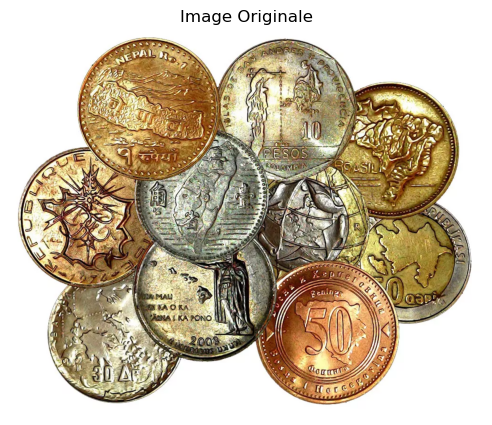

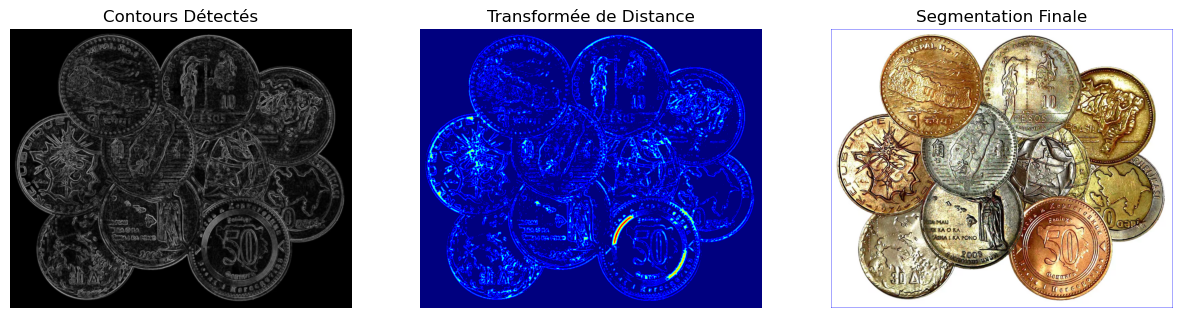

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = "/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab8/Images/a1.png"
image2 = cv2.imread(image_path)

# Afficher l'image originale
plt.figure(figsize=(10, 5))
plt.title("Image Originale")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Étape 1 : Conversion en niveaux de gris
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Étape 2 : Réduction du bruit avec un filtre Gaussien
blur1 = cv2.GaussianBlur(gray, (5, 5), 0)

# Étape 3 : Calcul du gradient avec Sobel pour détecter les contours
gradient1 = cv2.morphologyEx(blur1, cv2.MORPH_GRADIENT, kernel=np.ones((3, 3), np.uint8))

# Étape 4 : Binarisation (segmentation initiale)
_, binary = cv2.threshold(gradient1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Étape 5 : Détection des marqueurs avec la transformée de distance
dist_transform1 = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform1, 0.7 * dist_transform1.max(), 255, 0)
markers = np.uint8(markers)

# Étape 6 : Identifier les marqueurs et les objets
ret, markers = cv2.connectedComponents(markers)
markers = markers + 1  # Incrémenter pour éviter les confusions avec les bords

# Détection des contours : convertir les zones inconnues à zéro
unknown = cv2.subtract(binary, cv2.erode(binary, None))
markers[unknown == 255] = 0

# Étape 7 : Appliquer la ligne de partage des eaux
segmented = markers.copy()
cv2.watershed(image2, segmented)

# Étape 8 : Visualiser les résultats
# Marquer les contours sur l'image originale
image2[segmented == -1] = [255, 0, 0]  # Les frontières en rouge

# Affichage final
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title("Contours Détectés")
plt.imshow(cv2.cvtColor(gradient1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Transformée de Distance")
plt.imshow(dist_transform1, cmap='jet')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Segmentation Finale")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


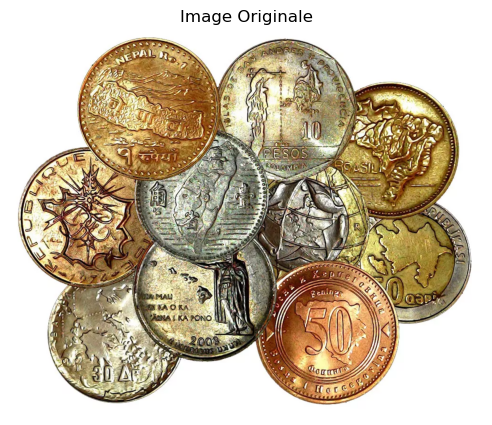

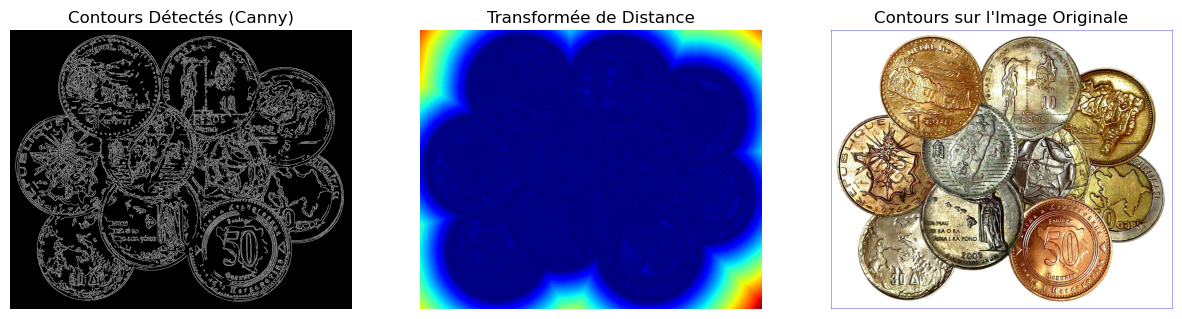

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = "/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab8/Images/a1.png"
image1 = cv2.imread(image_path)

# Afficher l'image originale
plt.figure(figsize=(10, 5))
plt.title("Image Originale")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Étape 1 : Conversion en niveaux de gris
# Cela facilite le traitement en réduisant les dimensions
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Étape 2 : Réduction avancée du bruit
# On utilise un filtre bilatéral pour préserver les contours tout en réduisant le bruit
blur2 = cv2.bilateralFilter(gray, 10, 75, 75)

# Étape 3 : Détection des contours avec Canny
# Le filtre Canny est robuste pour détecter des contours nets
edges = cv2.Canny(blur, 50, 150)

# Étape 4 : Binarisation améliorée
# On applique un seuillage adaptatif pour segmenter les zones d'intérêt
binary = cv2.adaptiveThreshold(
    blur2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2
)

# Étape 5 : Transformée de distance pour trouver les centres des objets
# La transformée de distance aide à identifier les noyaux (centres) des objets
dist_transform2 = cv2.distanceTransform(binary, cv2.DIST_L2, 5)

# On applique un seuil pour obtenir les marqueurs des objets
_, markers = cv2.threshold(dist_transform2, 0.5 * dist_transform2.max(), 255, 0)
markers = np.uint8(markers)

# Étape 6 : Identifier les marqueurs et les zones inconnues
# Détection des zones inconnues (bords entre les objets)
unknown = cv2.subtract(binary, cv2.erode(binary, None))

# On identifie les composants connectés pour initialiser les marqueurs
ret, markers = cv2.connectedComponents(markers)
markers = markers + 1  # On incrémente les marqueurs pour éviter les confusions
markers[unknown == 255] = 0  # Marquer les zones inconnues comme 0

# Étape 7 : Application de la ligne de partage des eaux
# On applique l'algorithme sur l'image d'origine
segmented = markers.copy()
cv2.watershed(image1, segmented)

# Étape 8 : Visualisation des résultats
# Coloration des segments pour une meilleure visualisation
segmented_image = np.zeros_like(image)
for marker in range(2, np.max(segmented) + 1):
    segmented_image[segmented == marker] = np.random.randint(0, 255, size=3)

# Ajouter les contours en rouge sur l'image originale
image1[segmented == -1] = [255, 0, 0]  # Contours en rouge

# Affichage des résultats
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title("Contours Détectés (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Transformée de Distance")
plt.imshow(dist_transform2, cmap='jet')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.title("Contours sur l'Image Originale")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


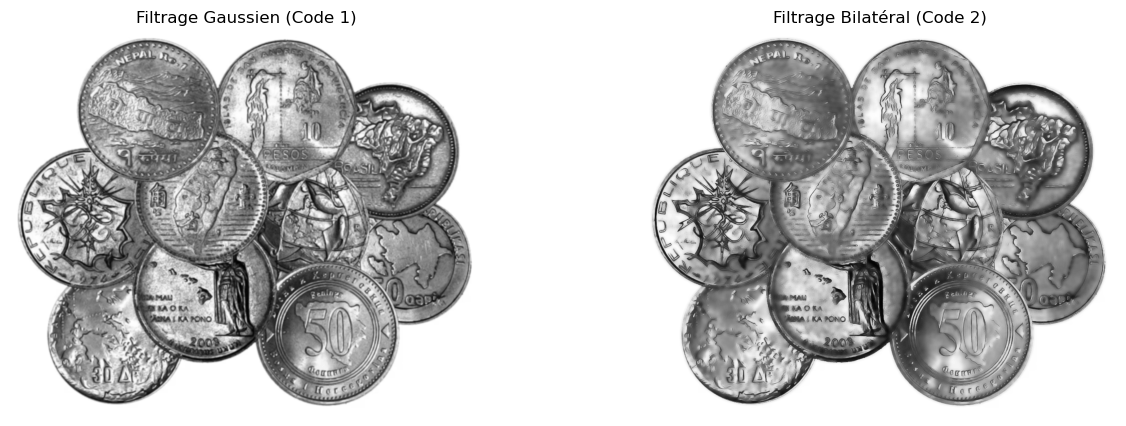

Différence moyenne entre les deux filtres : 7.170321464538574


In [62]:
# Comparaison des résultats de filtrage
plt.figure(figsize=(15, 5))

# Code 1 : Filtrage Gaussien
plt.subplot(1, 2, 1)
plt.title("Filtrage Gaussien (Code 1)")
plt.imshow(blur1, cmap='gray')
plt.axis('off')

# Code 2 : Filtrage Bilatéral
plt.subplot(1, 2, 2)
plt.title("Filtrage Bilatéral (Code 2)")
plt.imshow(blur2, cmap='gray')
plt.axis('off')

plt.show()

# Différence numérique entre les deux flous
difference_blur = np.abs(blur1.astype(np.float32) - blur2.astype(np.float32))
print(f"Différence moyenne entre les deux filtres : {np.mean(difference_blur)}")


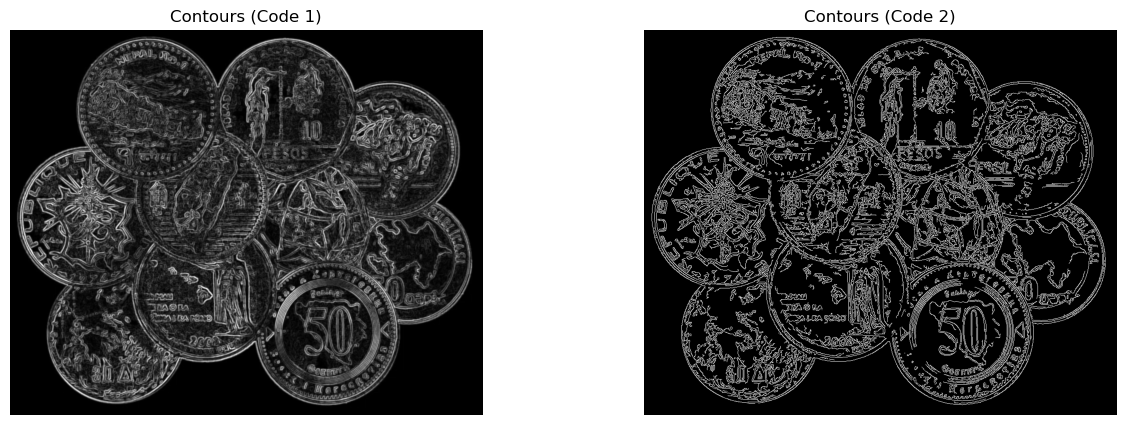

Différence moyenne entre les contours : 43.23820495605469


In [63]:
# Comparaison des contours
plt.figure(figsize=(15, 5))

# Code 1 : Gradient Morphologique
plt.subplot(1, 2, 1)
plt.title("Contours (Code 1)")
plt.imshow(gradient1, cmap='gray')
plt.axis('off')

# Code 2 : Contours Canny
plt.subplot(1, 2, 2)
plt.title("Contours (Code 2)")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

# Différence numérique entre les contours
difference_edges = np.abs(gradient1.astype(np.float32) - edges.astype(np.float32))
print(f"Différence moyenne entre les contours : {np.mean(difference_edges)}")


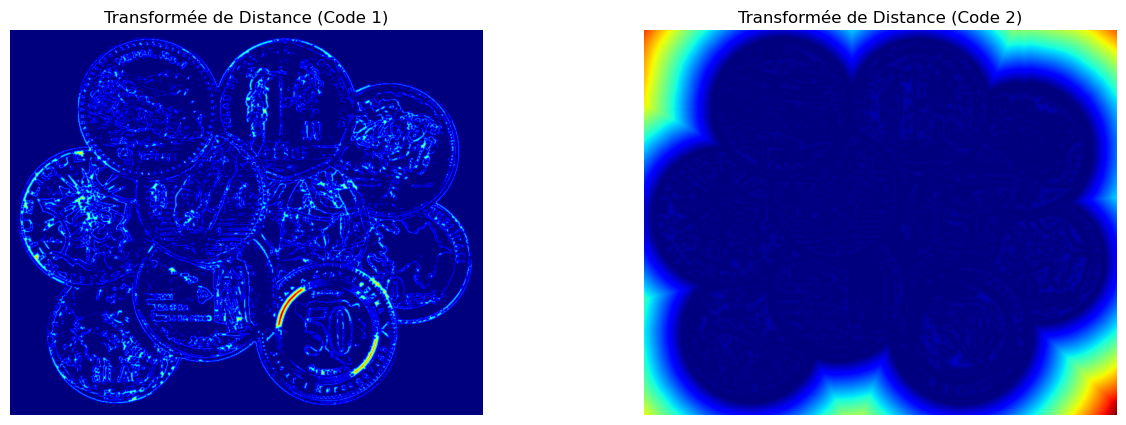

Différence moyenne entre les transformées de distance : 16.945493698120117


In [64]:
# Comparaison des transformées de distance
plt.figure(figsize=(15, 5))

# Code 1 : Transformée de distance
plt.subplot(1, 2, 1)
plt.title("Transformée de Distance (Code 1)")
plt.imshow(dist_transform1, cmap='jet')
plt.axis('off')

# Code 2 : Transformée de distance
plt.subplot(1, 2, 2)
plt.title("Transformée de Distance (Code 2)")
plt.imshow(dist_transform2, cmap='jet')
plt.axis('off')

plt.show()

# Différence numérique entre les transformées de distance
difference_dist_transform = np.abs(dist_transform1.astype(np.float32) - dist_transform2.astype(np.float32))
print(f"Différence moyenne entre les transformées de distance : {np.mean(difference_dist_transform)}")


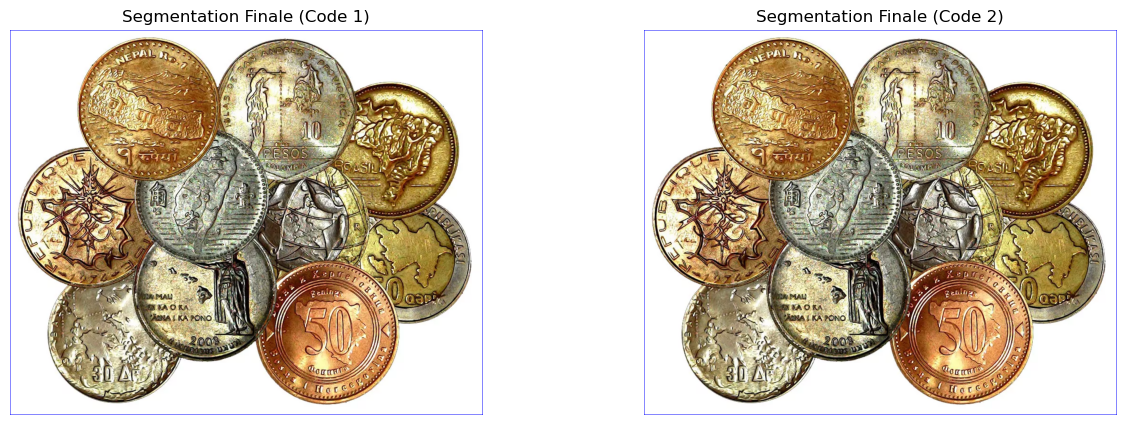

In [65]:
# Comparaison de la segmentation finale
plt.figure(figsize=(15, 5))

# Code 1 : Segmentation Finale
plt.subplot(1, 2, 1)
plt.title("Segmentation Finale (Code 1)")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Code 2 : Segmentation Finale
plt.subplot(1, 2, 2)
plt.title("Segmentation Finale (Code 2)")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()




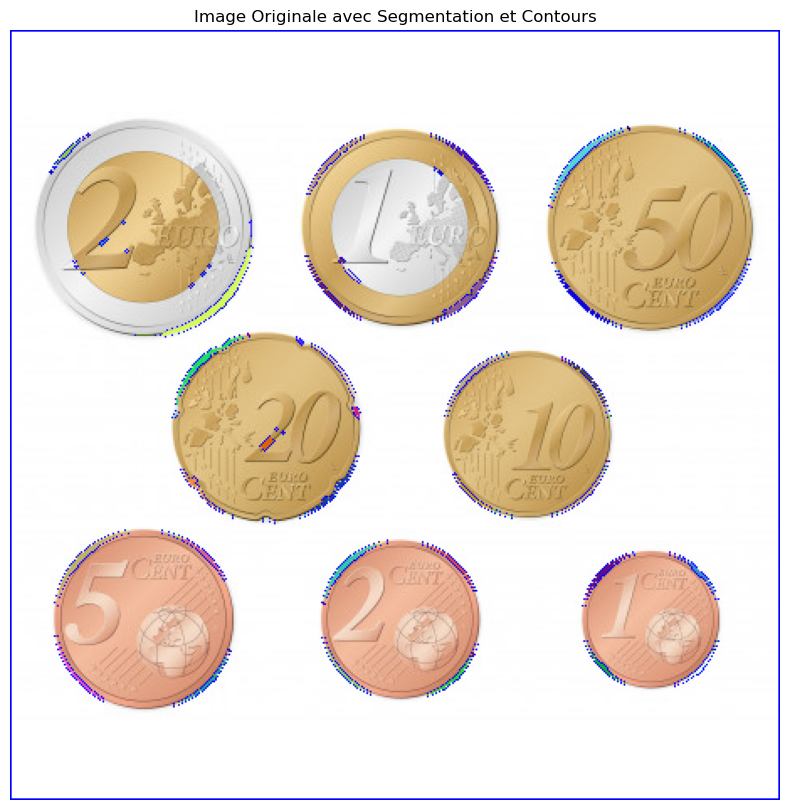

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab8/Images/a2.jpg"
image2 = cv2.imread(image_path)

gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
blur1 = cv2.GaussianBlur(gray, (5, 5), 0)
gradient1 = cv2.morphologyEx(blur1, cv2.MORPH_GRADIENT, kernel=np.ones((3, 3), np.uint8))
_, binary = cv2.threshold(gradient1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
dist_transform1 = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform1, 0.6 * dist_transform1.max(), 255, 0)
markers = np.uint8(markers)

ret, markers = cv2.connectedComponents(markers)
markers = markers + 1
unknown = cv2.subtract(binary, cv2.erode(binary, None, iterations=1))
markers[unknown == 255] = 0

segmented = markers.copy()
cv2.watershed(image2, segmented)

image_segmented = image2.copy()

for marker in range(2, np.max(segmented) + 1):
    image_segmented[segmented == marker] = np.random.randint(0, 255, size=3)

image_segmented[segmented == -1] = [255, 0, 0]

plt.figure(figsize=(10, 10))
plt.title("Image Originale avec Segmentation et Contours")
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


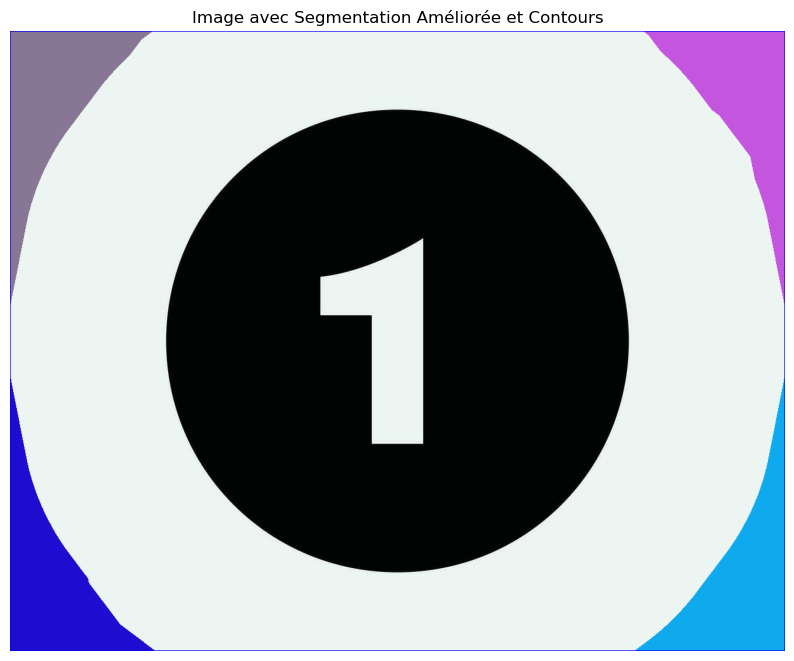

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab8/Images/a2.jpg"
image2 = cv2.imread(image_path)

# Étape 1 : Conversion en niveaux de gris
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Étape 2 : Réduction du bruit avec un filtre Gaussien
blur1 = cv2.GaussianBlur(gray, (5, 5), 0)

# Étape 3 : Binarisation avec un seuil adaptatif
binary = cv2.adaptiveThreshold(blur1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Étape 4 : Détection des marqueurs avec la transformée de distance
dist_transform1 = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform1, 0.6 * dist_transform1.max(), 255, 0)
markers = np.uint8(markers)

# Étape 5 : Identifier les marqueurs et les objets
ret, markers = cv2.connectedComponents(markers)
markers = markers + 1  # Incrémenter pour éviter les confusions avec les bords

# Étape 6 : Détecter les zones inconnues et les affecter
unknown = cv2.subtract(binary, cv2.erode(binary, None, iterations=3))  # Augmenter les itérations d'érosion

markers[unknown == 255] = 0

# Étape 7 : Appliquer la ligne de partage des eaux
segmented = markers.copy()
cv2.watershed(image2, segmented)

# Étape 8 : Colorier les segments avec des couleurs aléatoires
image_segmented = image2.copy()

# Colorier chaque segment avec une couleur distincte
for marker in range(2, np.max(segmented) + 1):
    image_segmented[segmented == marker] = np.random.randint(0, 255, size=3)

# Marquer les contours détectés en rouge
image_segmented[segmented == -1] = [255, 0, 0]  # Les frontières en rouge

# Affichage final de l'image avec segmentation et contours
plt.figure(figsize=(10, 10))
plt.title("Image avec Segmentation Améliorée et Contours")
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))  # Affichage de l'image avec contours colorés
plt.axis('off')
plt.show()


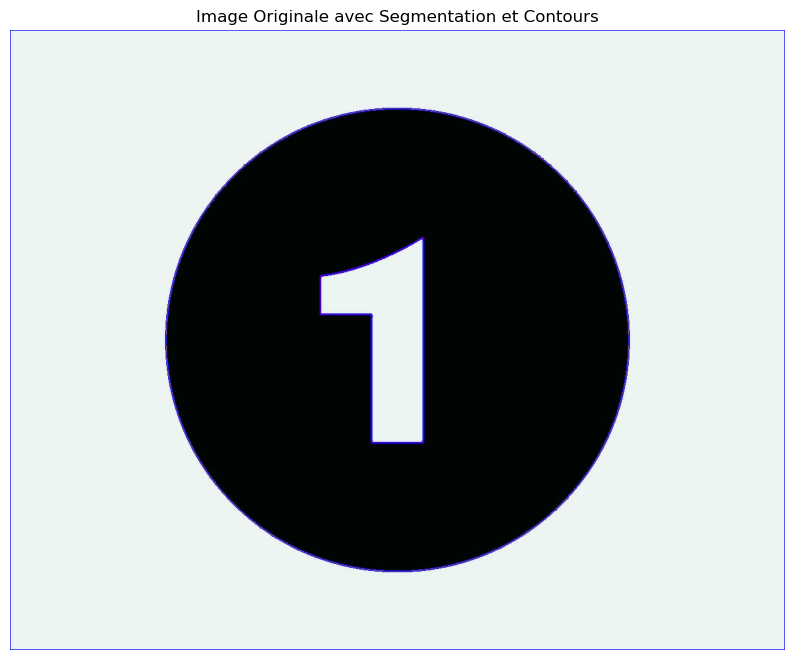

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab8/Images/a7.jpg"
image2 = cv2.imread(image_path)

gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
blur1 = cv2.GaussianBlur(gray, (5, 5), 0)
gradient1 = cv2.morphologyEx(blur1, cv2.MORPH_GRADIENT, kernel=np.ones((3, 3), np.uint8))
_, binary = cv2.threshold(gradient1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
dist_transform1 = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform1, 0.6 * dist_transform1.max(), 255, 0)
markers = np.uint8(markers)

ret, markers = cv2.connectedComponents(markers)
markers = markers + 1
unknown = cv2.subtract(binary, cv2.erode(binary, None, iterations=1))
markers[unknown == 255] = 0

segmented = markers.copy()
cv2.watershed(image2, segmented)

image_segmented = image2.copy()

for marker in range(2, np.max(segmented) + 1):
    image_segmented[segmented == marker] = np.random.randint(0, 255, size=3)

image_segmented[segmented == -1] = [255, 0, 0]

plt.figure(figsize=(10, 10))
plt.title("Image Originale avec Segmentation et Contours")
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


2024-11-26 23:27:34.808 python[70464:2272311] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-26 23:27:34.808 python[70464:2272311] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 

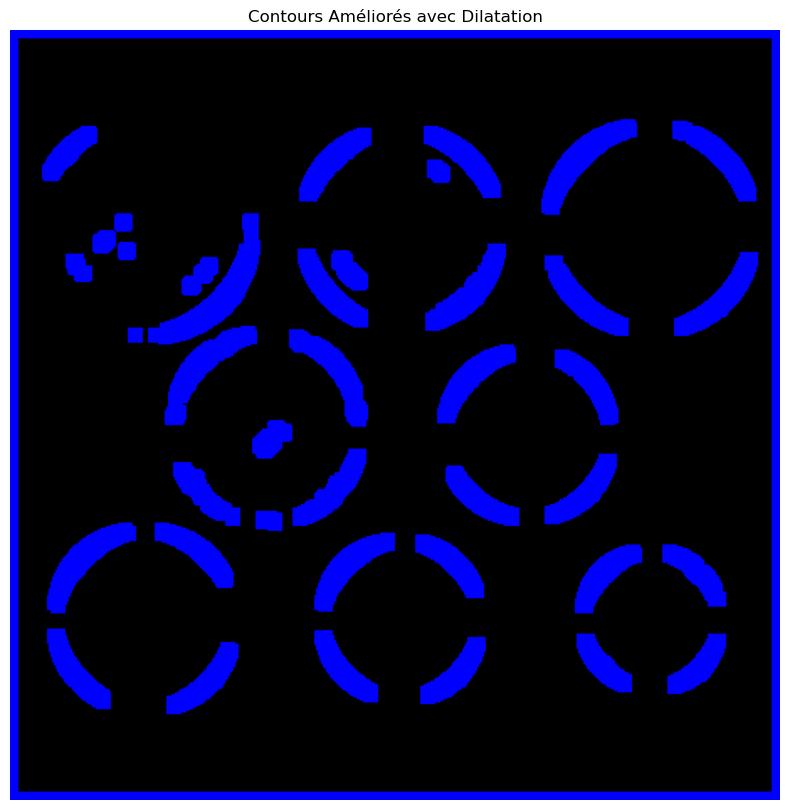

: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = "/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab8/Images/a2.jpg"
image2 = cv2.imread(image_path)

# Conversion en niveaux de gris
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Réduction du bruit avec un filtre Gaussien
blur1 = cv2.GaussianBlur(gray, (5, 5), 0)

# Calcul du gradient avec Sobel pour détecter les contours
gradient1 = cv2.morphologyEx(blur1, cv2.MORPH_GRADIENT, kernel=np.ones((3, 3), np.uint8))

# Binarisation (segmentation initiale)
_, binary = cv2.threshold(gradient1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Transformée de distance
dist_transform1 = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform1, 0.6 * dist_transform1.max(), 255, 0)
markers = np.uint8(markers)

# Identifier les marqueurs et les objets
ret, markers = cv2.connectedComponents(markers)
markers = markers + 1  # Incrémenter pour éviter les confusions avec les bords

# Détection des contours : convertir les zones inconnues à zéro
unknown = cv2.subtract(binary, cv2.erode(binary, None, iterations=1))
markers[unknown == 255] = 0

# Appliquer la ligne de partage des eaux
segmented = markers.copy()
cv2.watershed(image2, segmented)

# Créer une copie de l'image segmentée
image_segmented = image2.copy()

# Colorier les régions segmentées
for marker in range(2, np.max(segmented) + 1):
    image_segmented[segmented == marker] = np.random.randint(0, 255, size=3)

# Marquer les contours en rouge (dilatation pour les rendre plus visibles)
image_segmented[segmented == -1] = [255, 0, 0]  # Les contours en rouge

# Utiliser cv2.findContours pour détecter des contours plus fermés
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Créer une image de contours
contour_image = np.zeros_like(image2)
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 3)  # Dessiner les contours en rouge

# Améliorer les contours en dilatant les bords
contour_image = cv2.dilate(contour_image, np.ones((5, 5), np.uint8), iterations=2)  # Dilater les contours

# Affichage avec matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours Améliorés avec cv2.findContours")
plt.axis('off')
plt.show()


2024-11-27 09:23:15.562 python[72893:2365213] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-27 09:23:15.562 python[72893:2365213] +[IMKInputSession subclass]: chose IMKInputSession_Modern


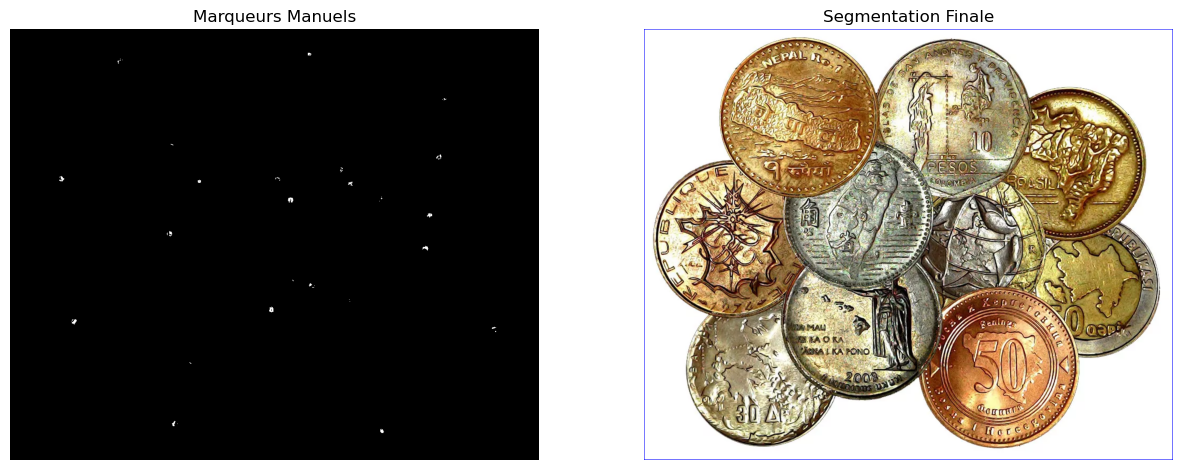

: 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image_path = "/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab8/Images/a1.png"
image2 = cv2.imread(image_path)
image_copy = image2.copy()  # Copie pour dessiner dessus

# Variables globales pour le dessin
drawing = False  # True lorsque la souris est en mode dessin
ix, iy = -1, -1
markers_manual = np.zeros(image2.shape[:2], dtype=np.int32)  # Marqueurs initiaux (matrice vide)

# Fonction de callback pour la souris
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, markers_manual

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(image_copy, (x, y), 5, (255, 255, 255), -1)  # Dessin visuel
            cv2.circle(markers_manual, (x, y), 5, 1, -1)  # Ajouter un marqueur

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(image_copy, (x, y), 5, (255, 255, 255), -1)
        cv2.circle(markers_manual, (x, y), 5, 1, -1)

# Afficher l'image et attendre les entrées de l'utilisateur
cv2.namedWindow("Dessiner les Marqueurs")
cv2.setMouseCallback("Dessiner les Marqueurs", draw_circle)

while True:
    cv2.imshow("Dessiner les Marqueurs", image_copy)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Appuyer sur Échap pour quitter
        break

cv2.destroyAllWindows()

# Étape 1 : Conversion en niveaux de gris
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Étape 2 : Réduction du bruit avec un filtre Gaussien
blur1 = cv2.GaussianBlur(gray, (5, 5), 0)

# Étape 3 : Calcul du gradient avec Sobel pour détecter les contours
gradient1 = cv2.morphologyEx(blur1, cv2.MORPH_GRADIENT, kernel=np.ones((3, 3), np.uint8))

# Étape 4 : Binarisation
_, binary = cv2.threshold(gradient1, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Combiner les marqueurs manuels avec les marqueurs automatiques
markers_manual[binary == 0] = 0  # Assurer que les zones non pertinentes sont 0
markers = markers_manual.copy()

# Étape 5 : Appliquer la ligne de partage des eaux
cv2.watershed(image2, markers)

# Marquer les frontières détectées sur l'image originale
image2[markers == -1] = [255, 0, 0]  # Contours en rouge

# Afficher les résultats
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Marqueurs Manuels")
plt.imshow(markers_manual, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmentation Finale")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()